<a href="https://colab.research.google.com/github/shiva650897/Machine-learning/blob/master/Transfer_Learning_Resnet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning ResNet50 using Keras

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
 !ln -s /content/drive/My\ Drive/ mydrive

In [5]:
train_path = "/content/mydrive/ColabNotebooks/datasets/CarBrandDatasets/Train"
valid_path = '/content/mydrive/ColabNotebooks/datasets/CarBrandDatasets/Test'

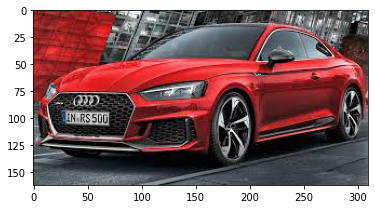

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('/content/mydrive/ColabNotebooks/datasets/CarBrandDatasets/Test/audi/21.jpg')  # this is a jpg image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img);

In [7]:
# re-size all the images to this
# Import the Resnet 50 library as shown below and add preprocessing layer to the front of Resnet50
# Here we will be using imagenet weights
IMAGE_SIZE = [224, 224]
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 3s 0us/step


In [8]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [9]:
  # useful for getting number of output classes
folders = glob("/content/mydrive/ColabNotebooks/datasets/CarBrandDatasets/Train/*")

In [10]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [16]:
len(training_set)

2

In [17]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch= len(training_set),
  validation_steps= len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 37s 19s/step - loss: 6.4878 - accuracy: 0.1875 - val_loss: 5.2094 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 13s 7s/step - loss: 9.7937 - accuracy: 0.3438 - val_loss: 5.2680 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 13s 7s/step - loss: 5.6318 - accuracy: 0.4688 - val_loss: 2.0017 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 13s 7s/step - loss: 3.3650 - accuracy: 0.3594 - val_loss: 7.7191 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 13s 7s/step - loss: 5.1380 - accuracy: 0.3438 - val_loss: 2.3045 - val_accuracy: 0.1897
Epoch 6/50
2/2 [==============================] - 13s 7s/step - loss: 1.6075 - accuracy: 0.5000 - val_loss: 2.0062 - val_accuracy: 0.4655
Epoch 7/50
2/2 [==============================] - 13s 7s/step - loss: 3.3161 - accuracy: 0.5156

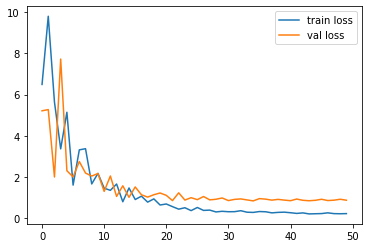

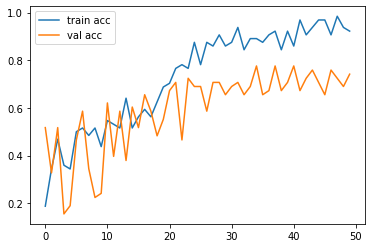

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [21]:

y_pred = model.predict(test_set)


In [22]:
y_pred

array([[2.38279626e-02, 9.58226502e-01, 1.79455541e-02],
       [1.53664628e-03, 9.79912460e-01, 1.85509231e-02],
       [1.04673989e-01, 6.24117851e-01, 2.71208137e-01],
       [7.20855832e-01, 2.48132855e-01, 3.10113039e-02],
       [1.91381350e-02, 9.03930008e-01, 7.69317821e-02],
       [9.47472274e-01, 4.31622304e-02, 9.36549995e-03],
       [7.78690353e-02, 7.05059767e-01, 2.17071190e-01],
       [1.84154183e-01, 7.21790791e-01, 9.40550417e-02],
       [3.94212231e-02, 8.37666631e-01, 1.22912206e-01],
       [1.83181791e-03, 9.95075881e-01, 3.09234997e-03],
       [5.53798079e-02, 6.04779780e-01, 3.39840382e-01],
       [9.71162785e-03, 7.38533556e-01, 2.51754910e-01],
       [2.80946612e-01, 6.03250444e-01, 1.15802869e-01],
       [9.12625715e-03, 9.90442812e-01, 4.30900458e-04],
       [1.77862227e-01, 7.35983133e-01, 8.61545950e-02],
       [8.96531641e-02, 9.01853919e-01, 8.49295966e-03],
       [9.83368307e-02, 1.76245514e-02, 8.84038627e-01],
       [7.52914190e-01, 1.86637

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0,
       1, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1])

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_resnet50.h5')

In [28]:
img=image.load_img('/content/mydrive/ColabNotebooks/datasets/CarBrandDatasets/Test/mercedes/39.jpg',target_size=(224,224))



In [29]:
x=image.img_to_array(img)
x

array([[[  8.,  12.,  21.],
        [ 31.,  36.,  39.],
        [ 68.,  72.,  71.],
        ...,
        [ 82.,  95.,  86.],
        [ 87., 103.,  93.],
        [ 95., 110., 103.]],

       [[ 15.,  22.,  30.],
        [ 77.,  82.,  85.],
        [ 87.,  93.,  91.],
        ...,
        [ 75.,  88.,  81.],
        [ 50.,  65.,  58.],
        [ 18.,  33.,  26.]],

       [[ 15.,  22.,  30.],
        [ 77.,  82.,  85.],
        [ 87.,  93.,  91.],
        ...,
        [ 75.,  88.,  81.],
        [ 50.,  65.,  58.],
        [ 18.,  33.,  26.]],

       ...,

       [[192., 179., 135.],
        [195., 182., 138.],
        [197., 184., 140.],
        ...,
        [187., 173., 138.],
        [190., 177., 142.],
        [199., 186., 152.]],

       [[192., 179., 135.],
        [195., 182., 138.],
        [197., 184., 140.],
        ...,
        [187., 173., 138.],
        [190., 177., 142.],
        [199., 186., 152.]],

       [[192., 179., 134.],
        [195., 182., 137.],
        [197., 1

In [30]:
x.shape

(224, 224, 3)

In [31]:
x=x/255

In [32]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [36]:
img_data

array([[[[-103.85665 , -116.73194 , -123.64863 ],
         [-103.786064, -116.637825, -123.55843 ],
         [-103.66057 , -116.49664 , -123.41333 ],
         ...,
         [-103.601746, -116.40645 , -123.35843 ],
         [-103.574295, -116.37508 , -123.33882 ],
         [-103.53508 , -116.347626, -123.30745 ]],

        [[-103.82136 , -116.692726, -123.62118 ],
         [-103.60567 , -116.45743 , -123.37804 ],
         [-103.58214 , -116.41429 , -123.33882 ],
         ...,
         [-103.62135 , -116.4339  , -123.38588 ],
         [-103.711555, -116.52409 , -123.483925],
         [-103.83704 , -116.64959 , -123.60941 ]],

        [[-103.82136 , -116.692726, -123.62118 ],
         [-103.60567 , -116.45743 , -123.37804 ],
         [-103.58214 , -116.41429 , -123.33882 ],
         ...,
         [-103.62135 , -116.4339  , -123.38588 ],
         [-103.711555, -116.52409 , -123.483925],
         [-103.83704 , -116.64959 , -123.60941 ]],

        ...,

        [[-103.40959 , -116.07704 , -1

In [33]:
model.predict(img_data)

array([[0.00531438, 0.0790318 , 0.9156538 ]], dtype=float32)

In [34]:
a=np.argmax(model.predict(img_data), axis=1)

In [35]:
a==2

array([ True])